## Data exploration with SQL
<br>
<img src="wfbglobe2.png" width="200" height="200" align='left'>


The C.I.A. world factbook contains statistical data about all the countries and territories on Earth.

**Some examples of the data collected and reported include population size and rates of growth, land areas, and migration rates.  This report appears to be from the year 2020.**

In this project we will exploring some of this information from a data set sourced from the CIA world factbook [website.](https://www.cia.gov/the-world-factbook/).  The facbook archives can be found [here.](https://www.cia.gov/the-world-factbook/about/archives/)

Our goal is gain some insights from the information using a variety of methods.

**We'll conclude with a summary about the information and how it may be used.**  
<br>


**The Data:**:
A copy of the database we are using is here: [factbook.db.](https://dsserver-prod-resources-1.s3.amazonaws.com/257/factbook.db)

**Objectives:**
* Explore
* Summary Statistics
* Identify
* Order
* Sort
* Visualize
* Data Type
* Summarize

**Tools:**
* Jupyter Notebook
* Python
* SQL

In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

'Connected: None@factbook.db'

**Let's explore our data types and values.**

In [2]:
%%sql
PRAGMA table_info(facts);

Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,1,None,1
1,code,varchar(255),1,None,0
2,name,varchar(255),1,None,0
3,area,integer,0,None,0
4,area_land,integer,0,None,0
5,area_water,integer,0,None,0
6,population,integer,0,None,0
7,population_growth,float,0,None,0
8,birth_rate,float,0,None,0
9,death_rate,float,0,None,0


In [3]:
%%sql
SELECT *
  FROM facts
 LIMIT 5;

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In this dataset we have the following columns to utilize:

* `name` — the name of the country.
* `area` — the total land and sea area of the country.
* `population` — the country's population.
* `population_growth`— the country's population growth as a percentage.
* `birth_rate` — the country's birth rate, or the number of births a year per 1,000 people.
* `death_rate` — the country's death rate, or the number of death a year per 1,000 people.
* `area`— the country's total area (both land and water).
* `area_land` — the country's land area in [square kilometers](https://www.cia.gov/the-world-factbook/field/area/).
* `area_water` — the country's water area in square kilometers.

We'll start with some summary statistics and see what they tell us.

## Summary Statistics.

In [4]:
%%sql
SELECT MIN(population) AS min_population,
       MAX(population) AS max_population,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) max_pop_growth
 FROM facts
WHERE population > 0;

Done.


min_population,max_population,min_pop_growth,max_pop_growth
48,7256490011,0.0,4.02


**Observations.**

From the summary statistics we can ask:

- What country has a population of **`0`**?
- What country has the lowest population growth that is not **`0`**?
- Which country has a population of **`7,256,490,011`** (or more than *7.2 billion people*)?

Let's look at this further with a subquery to identify these countries, we'll do so without any specific values.

## Exploring Our Observations.

In [5]:
%%sql
SELECT *
  FROM facts
 WHERE population == (SELECT MIN(population)
                        FROM facts
                     );

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


With this query we discover a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook page for [Antarctica.](https://www.cia.gov/the-world-factbook/countries/antarctica/):

Below is an example of how to add an 'image.jpg' file to a Jupyter Notebook report using a Markdown cell

![Factbook Antarctica Page](ant.png "Antarctica") 

<img src="ant2.png" width="200" height="200" align="left">

Let's see what other rows are in the table with a **0** population.  I'll search in groups of 20 and then narrow my search.

In [6]:
%%sql
SELECT name AS smallest_populations,
       population
  FROM facts
 ORDER BY population
 LIMIT 21;

Done.


smallest_populations,population
Ashmore and Cartier Islands,None
Coral Sea Islands,None
Heard Island and McDonald Islands,None
Clipperton Island,None
French Southern and Antarctic Lands,None
Bouvet Island,None
Jan Mayen,None
British Indian Ocean Territory,None
South Georgia and South Sandwich Islands,None
Navassa Island,None


Now, that we know there are 20 areas and bodies of water with no recorded populations we'll exclude these areas in further statistics when looking to compare populated areas and countries.  

Next, let's identify the row with the highest populations.

In [7]:
%%sql
SELECT *
  FROM facts
 WHERE population != 0
 ORDER by population DESC
 LIMIT 5;

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None
37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44
77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04
197,ee,European Union,4324782,None,None,513949445,0.25,10.2,10.2,2.5
186,us,United States,9826675,9161966,664709,321368864,0.78,12.49,8.15,3.86


The table also contains a row for the whole world, which explains the 7.2 + bill. population size. We also see the 'European Union' which is not a country, we'll keep this in mind when pulling averages.

Let's pull the summary statistics again while excluding the row for the 'world'.

## Summary Statistics Revisited.

In [8]:
%%sql
SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) AS max_pop_growth 
  FROM facts
 WHERE name NOT IN ('World', 'Antarctica', 'European Union');

Done.


min_pop,max_pop,min_pop_growth,max_pop_growth
48,1367485388,0.0,4.02


We can now confirm the population listed here belongs to China.  Later we'll compare this to other top populations. 

We can also note that the territory or area with the *lowest* population is the 'Pitcain Islands' with 48 people.

When we pull averages we'll exclude rows we identify may skew the information.

Let's confirm that countries in 'European Union' are listed, then we'll exclude the 'European Union' row so we don't count these values twice.

**European Union Countries.**

We'll pull these with a list.

In [25]:
%%sql
SELECT *
  FROM facts
 WHERE name IN ('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic',
                'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
                'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
                'Slovakia', 'Slovenia', 'Spain','Sweden')
 LIMIT 7;

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56
17,be,Belgium,30528,30278,250,11323973,0.76,11.41,9.63,5.87
26,bu,Bulgaria,110879,108489,2390,7186893,0.58,8.92,14.44,0.29
44,hr,Croatia,56594,55974,620,4464844,0.13,9.45,12.18,1.39
47,ez,Czech Republic,78867,77247,1620,10644842,0.16,9.63,10.34,2.33
48,da,Denmark,43094,42434,660,5581503,0.22,10.27,10.25,2.2
57,en,Estonia,45228,42388,2840,1265420,0.55,10.51,12.4,3.6


## Exploring Population and Area.

Let's explore density. Density depends on the population and the country's area.  

Let's look at values for these two columns excluding the rows for 'World', 'European Union' and areas with no populations.

**Average Population and Average Area.**

In [10]:
%%sql
SELECT ROUND(AVG(population),2) AS avg_population, ROUND(AVG(area),2) AS avg_area
  FROM facts
 WHERE name NOT IN ('World','European Union','Antarctica','Coral Sea Islands','Heard Island and McDonald Islands',
                    'Ashmore and Cartier Islands','Clipperton Island','French Southern and Antarctic Lands',
                    'Bouvet Island','Jan Mayen','British Indian Ocean Territory','South Georgia and South Sandwich Islands',
                    'Navassa Island','Wake Island','United States Pacific Island Wildlife Refuges','Paracel Islands',
                    'Spratly Islands','Arctic Ocean','Atlantic Ocean','Indian Ocean','Pacific Ocean','Southern Ocean'
);

Done.


avg_population,avg_area
30362063.59,567094.63


We see that the average population is **30,362,063 million** and the average area is **567,094 thousand square kilometers**.  


Now, let's look at the **smallest populations**.

In [11]:
%%sql
SELECT name AS smallest_populations,
       population
  FROM facts
 WHERE name NOT IN ('Antarctica','Coral Sea Islands','Heard Island and McDonald Islands','Ashmore and Cartier Islands',
                    'Clipperton Island','French Southern and Antarctic Lands','Bouvet Island','Jan Mayen','British Indian Ocean Territory',
                    'South Georgia and South Sandwich Islands','Navassa Island','Wake Island','United States Pacific Island Wildlife Refuges',
                    'Paracel Islands','Spratly Islands','Arctic Ocean','Atlantic Ocean','Indian Ocean','Pacific Ocean','Southern Ocean')
 ORDER BY population
 LIMIT 10;

Done.


smallest_populations,population
Pitcairn Islands,48
Cocos (Keeling) Islands,596
Holy See (Vatican City),842
Niue,1190
Tokelau,1337
Christmas Island,1530
Svalbard,1872
Norfolk Island,2210
Falkland Islands (Islas Malvinas),3361
Montserrat,5241


Have you heard of any of these areas? I've only heard of the 'Vatican City' from this list.

###  Densely Populated Countries

We'll continue, we'll build on the query above to find countries that are densely populated.  

We'll identify countries that have the following:

- *Above-average* values for population.
- *Below-average* values for area.

In [12]:
%%sql
SELECT *
  FROM facts
 WHERE population > (SELECT AVG(population)
                       FROM facts
                      WHERE population IS NOT NULL
                        AND population != 0
                        AND name NOT IN ('World','European Union')
                     )
   AND area < (SELECT AVG(area)
                 FROM facts
                WHERE population IS NOT NULL
                        AND population != 0
                        AND name NOT IN ('World','European Union'))
 ORDER BY population DESC;

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
192,vm,Vietnam,331210,310070,21140,94348835,0.97,15.96,5.93,0.3
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
173,th,Thailand,513120,510890,2230,67976405,0.34,11.19,7.8,0.0
185,uk,United Kingdom,243610,241930,1680,64088222,0.54,12.17,9.35,2.54
83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.1
91,ks,"Korea, South",99720,96920,2800,49115196,0.14,8.19,6.75,0.0
163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


**Some of these countries are generally known to be densely populated, so we have confidence in our results.**  

Let's move on to the highest populated countries.

In [13]:
%%sql
SELECT name AS country_with_most_people,
       population
  FROM facts
 WHERE name <> 'World'
 ORDER BY population DESC
 LIMIT 1;

Done.


country_with_most_people,population
China,1367485388


We saw earlier that China would win a tug-of-war contest with **1.367 billion people.**

**Now we'll retrieve the top countries by population and see how they compare.**

(Excluding the rows for World and European Union)

In [14]:
%%sql
SELECT name, population
FROM facts
WHERE name NOT IN ('World','European Union')
ORDER BY population DESC
LIMIT 9;

Done.


name,population
China,1367485388
India,1251695584
United States,321368864
Indonesia,255993674
Brazil,204259812
Pakistan,199085847
Nigeria,181562056
Bangladesh,168957745
Russia,142423773


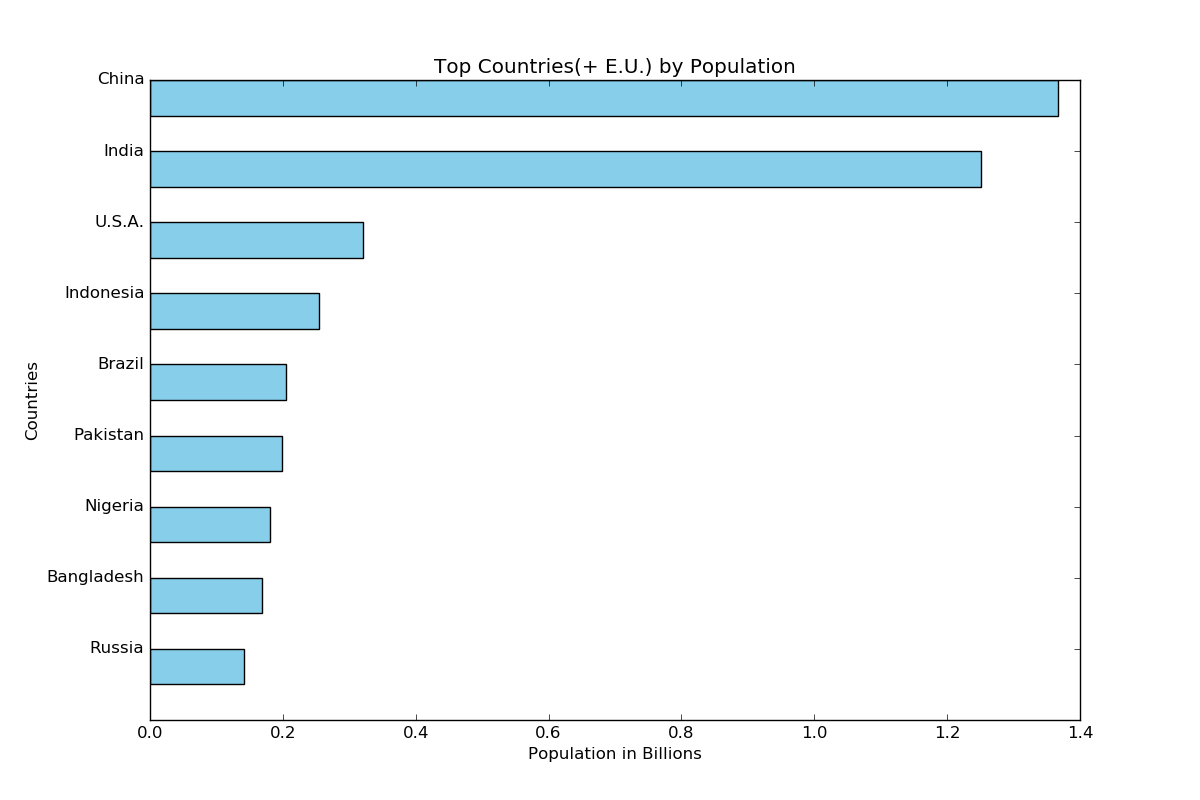

In [15]:
import matplotlib.pyplot as plt
from IPython.display import Image
#given data, still exploring how to use sql results for plots
countries = ['China','India','U.S.A.','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Russia']
population = [1.367, 1.251,.321,.255,.204,.199,.181,.168,.142]
#population in billions

#create numerical indices for countries, for the plot
indices = range(len(countries))

# Create barh chart
plt.figure(figsize=(12, 8))
plt.barh(indices, population, color='skyblue', height=0.5)  # Adjust the height parameter to control the thickness of the bars
plt.yticks(indices, countries)  # Set y-ticks to display country names
plt.xlabel('Population in Billions')
plt.ylabel('Countries')
plt.title('Top Countries(+ E.U.) by Population')
plt.gca().invert_yaxis()  # Invert y-axis to display highest population at the top
plt.savefig('plot.png')
plt.show()

Image(filename='plot.png')

**Observation.**

China and India have about *4 to 5 times* the volume of people five of the other countries on the list.

Next, the countries with the lowest and highest population growth rates.

In [16]:
%%sql
SELECT 
    name AS country, 
    population,
    population_growth AS pop_growth
 FROM facts 
WHERE population != 0
  AND population IS NOT NULL
ORDER BY population_growth
LIMIT 10;

Done.


country,population,pop_growth
Kosovo,1870981,None
Saint Barthelemy,7237,None
Saint Martin,31754,None
Akrotiri,15700,None
Dhekelia,15700,None
Holy See (Vatican City),842,0.0
Cocos (Keeling) Islands,596,0.0
Greenland,57733,0.0
Pitcairn Islands,48,0.0
Greece,10775643,0.01


In [17]:
%%sql
SELECT name AS country_with_highest_growth_rate,
       population,
       population_growth
  FROM facts
 WHERE name <> 'World'
 ORDER BY population_growth DESC
 LIMIT 1;


Done.


country_with_highest_growth_rate,population,population_growth
South Sudan,12042910,4.02


## Insights.

Countries with the most people may have significant economic impacts and social influence within and outside of their own societies.  We could see this with some economic growth data like the GDP of China and India and compare that with low populated countries with a lower growth rate.

Conutries higher population growth rates may also be experiencing rapid demographic changes, which could impact various aspects of its society and economy. 

Some of the contributing factors include information included in this dataset such as **birth**, **death**, and **migration rates**.  

Other factors include **fertility**, **age structure** and **governmental policies** with a high impact the well-being of a society in their respective country.

>Sources:
United Nations, Department of Economic and Social Affairs, Population Division. (2021). World Population Prospects 2019: Highlights.
World Bank Group. (2020). World Development Indicators.
National Institute on Aging. (2018). Why Population Aging Matters: A Global Perspective.
United States Census Bureau. (2021). International Data Base.

#### Which countries have the highest ratios of water to land? 

In [18]:
%%sql
SELECT name AS country,
       CAST(area_water AS FLOAT) / area_land AS water_to_land_ratio
  FROM facts
 WHERE name <> 'World'
 ORDER BY water_to_land_ratio DESC
 LIMIT 5;

Done.


country,water_to_land_ratio
British Indian Ocean Territory,905.6666666666666
Virgin Islands,4.520231213872832
Puerto Rico,0.5547914317925592
"Bahamas, The",0.3866133866133866
Guinea-Bissau,0.2846728307254623


#### Countries with more water than land.

In [19]:
%%sql
SELECT name AS country,
       area_land,
       area_water
  FROM facts
 WHERE area_water > area_land
   AND name <> 'World';

Done.


country,area_land,area_water
British Indian Ocean Territory,60,54340
Virgin Islands,346,1564


## Insights:

Countries with high water-to-land ratios may have unique geographical features or be located in regions with significant water bodies.

Countries with more water than land may face specific challenges related to land use, infrastructure, and environmental management.

#### Which countries with the highest population growth rates?
 Which countries will add the most people to their populations next year?

In [20]:
%%sql
SELECT name AS country,
       population,
       population_growth,
       ROUND(population * population_growth / 100) AS population_increase
  FROM facts
 WHERE name <> 'World'
 ORDER BY population_increase DESC
 LIMIT 5;

Done.


country,population,population_growth,population_increase
India,1251695584,1.22,15270686.0
China,1367485388,0.45,6153684.0
Nigeria,181562056,2.45,4448270.0
Pakistan,199085847,1.46,2906653.0
Ethiopia,99465819,2.89,2874562.0


## Insights.

Countries with high growth rates may experience increased demand for resources, infrastructure, services, and other major demographic changes.

Understanding population growth trends can inform policies related to healthcare, education, and economic development.

**Now let's see where the death rate exceeds the birth rate.** (sorted starting with the highest death rate ratios)

In [21]:
%%sql
SELECT name AS country,
       birth_rate,
       death_rate,
       ROUND(birth_rate - death_rate, 2) AS rate_difference
  FROM facts
 WHERE death_rate > birth_rate
 ORDER BY rate_difference
 LIMIT 7;

Done.


country,birth_rate,death_rate,rate_difference
Bulgaria,8.92,14.44,-5.52
Serbia,9.08,13.66,-4.58
Latvia,10.0,14.31,-4.31
Lithuania,10.1,14.27,-4.17
Ukraine,10.72,14.46,-3.74
Hungary,9.16,12.73,-3.57
Germany,8.47,11.42,-2.95


**Top countries with a high death rate over their birth rate.**

In [22]:
%%sql
SELECT name, death_rate, birth_rate
FROM facts
WHERE death_rate > birth_rate
ORDER BY death_rate DESC
LIMIT 5;

Done.


name,death_rate,birth_rate
Ukraine,14.46,10.72
Bulgaria,14.44,8.92
Latvia,14.31,10.0
Lithuania,14.27,10.1
Russia,13.69,11.6


## Insights.

There may exist population dynamics and potential challenges related to aging populations or health and health care issues.

Which countries have the highest population/area ratio?

In [23]:
%%sql
SELECT name, population, area, population/area AS population_area_ratio
FROM facts
ORDER BY population_area_ratio DESC
LIMIT 10;

Done.


name,population,area,population_area_ratio
Macau,592731,28,21168
Monaco,30535,2,15267
Singapore,5674472,697,8141
Hong Kong,7141106,1108,6445
Gaza Strip,1869055,360,5191
Gibraltar,29258,6,4876
Bahrain,1346613,760,1771
Maldives,393253,298,1319
Malta,413965,316,1310
Bermuda,70196,54,1299


### Insights.

**Analysing population and area density information can help identify patterns and trends such as:** 

* Population Distribution Patterns (source: World Bank - World Development Indicators)
* Urbanization Trends (source: United Nations - World Urbanization Prospects).

**Which help inform decision surrounding:**

* Resource allocation, urban density planning, and sustainability planning.
* Assessment of Resource Management.(source: National Geographic - "Population Density")
* Stimulation of Economic Productivity and Innovation.(source: The Brookings Institution - "Density: Drivers, Dividends, and Debates")
* Programs to improve on Health and Quality of Life Challenges.(source: World Health Organization - "Urbanization and Health")

We'll wrap up with looking at the top **migration rates.** 

In [24]:
%%sql
SELECT name, migration_rate
FROM facts
ORDER BY migration_rate DESC
LIMIT 10;

Done.


name,migration_rate
Qatar,22.39
American Samoa,21.13
"Micronesia, Federated States of",20.93
Syria,19.79
Tonga,17.84
British Virgin Islands,17.28
Luxembourg,17.16
Cayman Islands,14.4
Singapore,14.05
Nauru,13.63


## What Next?

Further insights from this database may be gained by joining other datasets to explore topics such as:

**Health Indicators:** Analyze factors such as life expectancy, infant mortality rate, and access to healthcare to assess the overall health status of different countries.  

**Economic Indicators:** Investigate metrics like GDP per capita, unemployment rate, and income distribution to understand the economic conditions across countries.

**Environmental Factors:** Examine data on carbon emissions, renewable energy usage, and deforestation rates to evaluate environmental sustainability efforts.

**Demographic Trends:** Further explore migration patterns, age distributions, and urbanization rates to identify demographic shifts and societal changes.

# Summary.

In this project, we explored a **CIA World Factbook** dataset using SQL. 

Here's a summary of the information we explored:

1. **Summary Statistics:** We calculated the minimum and maximum population, as well as the minimum and maximum population growth rates. We discovered outliers such as an area with a population of 0 and another with over 7.2 billion people.

2. **Exploring Outliers:** We identified the area countries with the lowest and highest populations.  Areas with no populations like Antarctica and areas with `0` or no recorded population growth rates.  We alse discovered rows for the aggregate values like the World, European Union and some for bodies of water.

3. **Average Population and Area:** We calculated the average population and area of countries, excluding the row for the whole world and the european union (so not as to double count), and areas with no people to correctly account for the averages.

4. **Densely Populated Countries:** We identified countries with above-average population and below-average area, indicating densely populated regions.

5. **Insigths:** We identified other information that may be used to gain further insights on the causes of population distribution and population density.  We also listed futher health and economic indicators could be explored by incorporating other data sets to futher understand conditions and factors that affect and inform a countries social and urban policy.

**Throughout the analysis, we used various SQL queries, including subqueries, to extract meaningful insights from the dataset.**

**We addressed all the project objectives and explored the areas, population, birth rates, and death ratess across different countries.**

**We explored, identified, ordered, visualized and looked at summary statistics for the dataset.**

With this summary exploration, we have a better understanding of the diverse characteristics of countries worldwide.  This type of information can be used to inform policy decisions, strategic planning, and further research in various fields.

**images:**The World Factbook 2021. Washington, DC: Central Intelligence Agency, 2021.(Information)[https://www.cia.gov/] Images - Factbook images and photos - obtained from a variety of sources and are in the public domain and are copyright free.